In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#load json file into dataframe
df_palette = pd.read_json('../data/palette.json')
df_palette = df_palette.transpose()
#make the index a column called Color
df_palette.reset_index(level=0, inplace=True)
df_palette.rename(columns={'index':'Color'}, inplace=True)
df_palette

,Color,Hex,Certainty
0,Yellow Mid,#ffeb00,Mid
1,Deep Cian Blue,#0014ff,Low
2,Phthalo Blue,#000f89,High
3,Purple,#800080,High
4,Silver,#c0c0c0,High
5,Crimson,#dc143c,High
6,Orange,#ffa500,High
7,Magenta,#ff00ff,High
8,Raw Sienna,#d68a59,High
9,Lamp Black,#2c2c2c,High


In [3]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

def rgb_to_cmk(rgb):
    cmk = (1-rgb[0]/255, 1-rgb[1]/255, 1-rgb[2]/255)
    return cmk

def cmk_to_rgb(cmk):
    rgb = (1-cmk[0])*255, (1-cmk[1])*255, (1-cmk[2])*255
    return rgb

def rgb_to_hsv(rgb):
    r = rgb[0]/255
    g = rgb[1]/255
    b = rgb[2]/255
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin
    if delta == 0:
        h = 0
    elif cmax == r:
        h = 60 * (((g-b)/delta) % 6)
    elif cmax == g:
        h = 60 * (((b-r)/delta) + 2)
    elif cmax == b:
        h = 60 * (((r-g)/delta) + 4)
    if cmax == 0:
        s = 0
    else:
        s = delta/cmax
    v = cmax
    hsv = (h, s, v)
    return hsv




In [4]:
#add a ymc column to the dataframe
df_palette['cmk'] = df_palette['Hex'].apply(hex_to_rgb).apply(rgb_to_cmk)

In [46]:
#combine a list of ymc colors into a single ymc color
#sum the cmk values and divide by the number of colors
def combine_cmk_colors(cmk_colors, weights):
    cmk_colors = np.array(cmk_colors)
    cmk = np.array([0,0,0])
    for i in range(len(cmk_colors)):
        cmk = cmk + cmk_colors[i]*weights[i]
    cmk = cmk/sum(weights)
    return cmk





In [47]:
len_palette = len(df_palette)
proportions = [[0.5, 0.5], [0.75, 0.25], [0.25, 0.75]]
#proportions = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
list_2_colors = []
#combining two colors
for i in range(len_palette):
    color_i = df_palette['cmk'][i]
    for j in range(len_palette):
        color_j = df_palette['cmk'][j]
        if i == j:
            continue

        for proportion in proportions:  
            cmk_color = combine_cmk_colors([color_i, color_j], proportion)
            dict_colors = {
            'color_i': df_palette['Color'][i],
            'color_j': df_palette['Color'][j],
            'color_i_hex': df_palette['Hex'][i], 
            'color_j_hex': df_palette['Hex'][j],
            'proportion_i': proportion[0],
            'proportion_j': proportion[1],
            'color_ij_hex': rgb_to_hex(cmk_to_rgb(cmk_color))
            }
            list_2_colors.append(dict_colors)


            
    

In [55]:
len_palette = len(df_palette)
proportions_3colors = [[0.33, 0.33, 0.33], [0.5, 0.25, 0.25], [0.25, 0.5, 0.25], [0.25, 0.25, 0.5]]

list_3_colors = []
#combining two colors
for i in range(len_palette):
    color_i = df_palette['cmk'][i]
    for j in range(len_palette):
        color_j = df_palette['cmk'][j]
        for k in range(len_palette):
            color_k = df_palette['cmk'][k]
            if i == j == k:
                continue

            for proportion in proportions_3colors:  
                cmk_color = combine_cmk_colors([color_i, color_j, color_k], proportion)
                dict_colors = {
                'color_i': df_palette['Color'][i],
                'color_j': df_palette['Color'][j],
                'color_k': df_palette['Color'][k],  
                'color_i_hex': df_palette['Hex'][i], 
                'color_j_hex': df_palette['Hex'][j],
                'color_k_hex': df_palette['Hex'][k],
                'proportion_i': proportion[0],
                'proportion_j': proportion[1],
                'proportion_k': proportion[2],
                'color_ijk_hex': rgb_to_hex(cmk_to_rgb(cmk_color))
                }
                list_3_colors.append(dict_colors)

In [56]:
df_3_colors = pd.DataFrame(list_3_colors)
df_3_colors

,color_i,color_j,color_k,color_i_hex,color_j_hex,color_k_hex,proportion_i,proportion_j,proportion_k,color_ijk_hex
0,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.33,0.33,0.33,#aaa354
1,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.50,0.25,0.25,#bfb53f
2,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.25,0.50,0.25,#bfb53f
3,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.25,0.25,0.50,#7f7f7f
4,Yellow Mid,Yellow Mid,Phthalo Blue,#ffeb00,#ffeb00,#000f89,0.33,0.33,0.33,#aaa12d
...,...,...,...,...,...,...,...,...,...,...
55195,Lemon Yellow,Lemon Yellow,Cerulean Blue,#fff700,#fff700,#2a52be,0.25,0.25,0.50,#94a45f
55196,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.33,0.33,0.33,#b0b60b
55197,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.50,0.25,0.25,#c3c608
55198,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.25,0.50,0.25,#c3c608


In [49]:
df_2_colors = pd.DataFrame(list_2_colors)
df_2_colors

,color_i,color_j,color_k,color_i_hex,color_j_hex,color_k_hex,proportion_i,proportion_j,proportion_k,color_ij_hex
0,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.33,0.33,0.33,#aaa354
1,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.50,0.25,0.25,#bfb53f
2,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.25,0.50,0.25,#bfb53f
3,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.25,0.25,0.50,#7f7f7f
4,Yellow Mid,Yellow Mid,Phthalo Blue,#ffeb00,#ffeb00,#000f89,0.33,0.33,0.33,#aaa12d
...,...,...,...,...,...,...,...,...,...,...
55195,Lemon Yellow,Lemon Yellow,Cerulean Blue,#fff700,#fff700,#2a52be,0.25,0.25,0.50,#94a45f
55196,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.33,0.33,0.33,#b0b60b
55197,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.50,0.25,0.25,#c3c608
55198,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.25,0.50,0.25,#c3c608


color_i         Yellow Mid
color_j         Raw Sienna
color_k             Orange
color_i_hex        #ffeb00
color_j_hex        #d68a59
color_k_hex        #ffa500
proportion_i           0.5
proportion_j          0.25
proportion_k          0.25
color_ij_hex       #f4c116
Name: 789, dtype: object


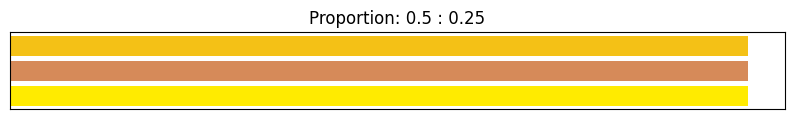

In [54]:
#fucntion to plot three colors one side by side, 3 vertical rectangles, color is passed in hex
def plot_2_colors(color_i_hex, color_j_hex, color_ij_hex, proportion_i, proportion_j):
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Proportion: ' + str(proportion_i) + ' : ' + str(proportion_j))
    ax.barh(0, 1, color=color_i_hex)
    ax.barh(1, 1, color=color_j_hex)
    ax.barh(2, 1, color=color_ij_hex)
    plt.show()

idx = 789
print(df_2_colors.iloc[idx])
plot_2_colors(df_2_colors.loc[idx,"color_i_hex"], df_2_colors.loc[idx,"color_j_hex"], df_2_colors.loc[idx,"color_ij_hex"],df_2_colors.loc[idx,"proportion_i"],df_2_colors.loc[idx,"proportion_j"])

color_i           Phthalo Blue
color_j          Phthalo Green
color_k             Raw Sienna
color_i_hex            #000f89
color_j_hex            #123524
color_k_hex            #d68a59
proportion_i              0.25
proportion_j               0.5
proportion_k              0.25
color_ijk_hex          #3e404a
Name: 6742, dtype: object


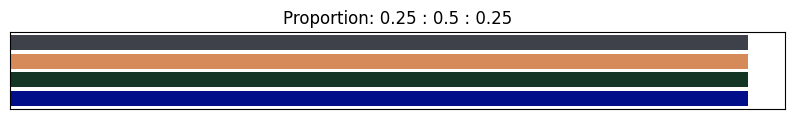

In [58]:
def plot_3_colors(color_i_hex, color_j_hex, color_k_hex, color_ijk_hex, proportion_i, proportion_j, proportion_k):
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Proportion: ' + str(proportion_i) + ' : ' + str(proportion_j) + ' : ' + str(proportion_k))
    ax.barh(0, 1, color=color_i_hex)
    ax.barh(1, 1, color=color_j_hex)
    ax.barh(2, 1, color=color_k_hex)
    ax.barh(3, 1, color=color_ijk_hex)
    plt.show()

idx = 6742
print(df_3_colors.iloc[idx])
plot_3_colors(df_3_colors.loc[idx,"color_i_hex"], df_3_colors.loc[idx,"color_j_hex"], df_3_colors.loc[idx,"color_k_hex"], df_3_colors.loc[idx,"color_ijk_hex"],df_3_colors.loc[idx,"proportion_i"],df_3_colors.loc[idx,"proportion_j"],df_3_colors.loc[idx,"proportion_k"])


In [59]:
#function that maps hsv to a two dimensional space, color triangle
def hsv_to_triangle(hex):
    hsv = rgb_to_hsv(hex_to_rgb(hex))
    h = hsv[0]
    s = hsv[1]
    v = hsv[2]
    x = s*np.cos(h*np.pi/180)
    y = s*np.sin(h*np.pi/180)
    return (x, y)

In [60]:
#fucntion to map a hex color to a 2d color to plot in a color triangle
def map_hex_to_2d(hex_color):
    rgb_color = hex_to_rgb(hex_color)
    cmk_color = rgb_to_cmk(rgb_color)
    x = cmk_color[0] - cmk_color[2]/2
    y = cmk_color[1] - cmk_color[2]/2
    return [x,y]

In [61]:
import math

def map_hex_to_wheel(hex_color, image_size=10):
    rgb = hex_to_rgb(hex_color)
    hsv = rgb_to_hsv(rgb)

    rads = math.tau * hsv[0] - math.pi
    mag = hsv[1] * (image_size/2) - 1 


    x = math.cos(rads) * mag + (image_size/2)
    y =math.sin(rads) * mag + (image_size/2)

    return (x, y)

#map hex color to a x,y coordinates that correspond to a maxell color triangle
def map_hex_to_triangle(hex_color):
    rgb_color = hex_to_rgb(hex_color)
    cmk_color = rgb_to_cmk(rgb_color)
    x = cmk_color[0] - cmk_color[2]/2
    y = cmk_color[1] - cmk_color[2]/2
    return [x,y]



In [35]:
#df_2_colors['color_i_2d'] = df_2_colors['color_ij_hex'].apply(map_hex_to_2d)
df_2_colors['color_ij_2d'] = df_2_colors['color_ij_hex'].apply(hsv_to_triangle)
df_2_colors

,color_i,color_j,color_i_hex,color_j_hex,proportion_i,proportion_j,color_ij_hex,color_ij_2d
0,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.1,0.9,#1929e5,"(-0.507206293067022, -0.7323382555630127)"
1,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.2,0.8,#323ecc,"(-0.42948290108941567, -0.6208231697253421)"
2,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.3,0.7,#4c54b2,"(-0.32626472222569675, -0.47108275428070195)"
3,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.4,0.6,#666999,"(-0.18412165765350175, -0.27786746174037324)"
4,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.6,0.4,#999466,"(0.19537427889507142, 0.2700740680949245)"
...,...,...,...,...,...,...,...,...
4411,Lemon Yellow,Phthalo Green,#fff700,#123524,0.4,0.6,#708215,"(0.2880319620223076, 0.7874359277635672)"
4412,Lemon Yellow,Phthalo Green,#fff700,#123524,0.6,0.4,#a0a90e,"(0.409465722894601, 0.8206825532542275)"
4413,Lemon Yellow,Phthalo Green,#fff700,#123524,0.7,0.3,#b7bc0a,"(0.44908326203501225, 0.8335289914436717)"
4414,Lemon Yellow,Phthalo Green,#fff700,#123524,0.8,0.2,#cfd007,"(0.47880644454374127, 0.8393862506120979)"


In [62]:
df_3_colors['color_ijk_2d'] = df_3_colors['color_ijk_hex'].apply(hsv_to_triangle)

4416
0.0
22.644927536231883
45.289855072463766
67.93478260869566
90.57971014492753


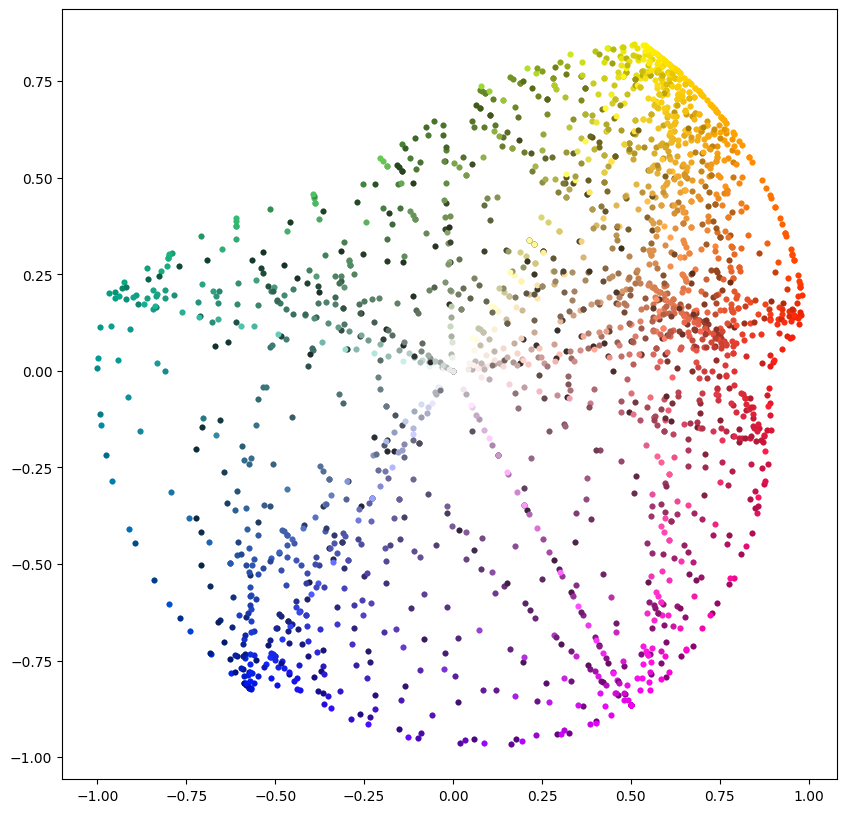

In [38]:
#plot all the x y colors in the dataframe in a 2s scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
print(len(df_2_colors))
for i in range(len(df_2_colors)):
    if i%1000 == 0:
        print(100 * i/len(df_2_colors))
    plt.scatter(df_2_colors['color_ij_2d'][i][0], df_2_colors['color_ij_2d'][i][1], color=df_2_colors['color_ij_hex'][i], s=10)

plt.show()


In [63]:
#plot all the x y colors in the dataframe in a 2s scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
print(len(df_3_colors))
for i in range(len(df_3_colors)):
    if i%1000 == 0:
        print(100 * i/len(df_3_colors))
    plt.scatter(df_3_colors['color_ijk_2d'][i][0], df_3_colors['color_ijk_2d'][i][1], color=df_3_colors['color_ijk_hex'][i], s=10)

55200
0.0
1.8115942028985508
3.6231884057971016
5.434782608695652
7.246376811594203
9.057971014492754
10.869565217391305
12.681159420289855
14.492753623188406
16.304347826086957
18.115942028985508
19.92753623188406
21.73913043478261
23.55072463768116
